In [2]:
# 1. 머신러닝
# 1-1. EDA
# 1-2. 상관분석 후 이상치 데이터 처리
# 2-1. 차원축소 방법 2가지 이상 비교하고 한가지 선택
# 2-2. 선택한 차원축소 구현
# 3-1. [2-2] 데이터로 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현
# 3-2. [3-1] 구현 및 알고리즘 2가지 이상 비교, 성능 측정
# 4-1. [2-2] 데이터로 부정거래 감지 모델 2가지 이상 비교 및 선택
# 4-2. [4-1] 구현 및 알고리즘 성능 측정
# 4-3. 데이터분석가 관점에서 [3-2]와 [4-2]의 결과에 대해 분석

In [1]:
import pandas as pd
df = pd.read_csv('data/creditcard.csv')
'''
df_2 = df[df['Class'] == 0]
df_2 = df_2.reset_index(drop = True)
df_2 = df_2.drop(labels=range(0, 283307), axis=0)
df = pd.concat([df[df['Class'] == 1], df_2], axis = 0)
df = df.reset_index(drop = True)
df
'''

"\ndf_2 = df[df['Class'] == 0]\ndf_2 = df_2.reset_index(drop = True)\ndf_2 = df_2.drop(labels=range(0, 283307), axis=0)\ndf = pd.concat([df[df['Class'] == 1], df_2], axis = 0)\ndf = df.reset_index(drop = True)\ndf\n"

In [2]:
from pandas_profiling import ProfileReport
ProfileReport(df, 
              missing_diagrams=None, 
              interactions=None,
              correlations={"pearson": {"calculate": True, "threshold": 0.8},
                            "spearman": {"calculate": False},
                            "kendall": {"calculate": False},
                             "phi_k": {"calculate": False},
                            "cramers": {"calculate": False}},
              explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<BarContainer object of 2 artists>

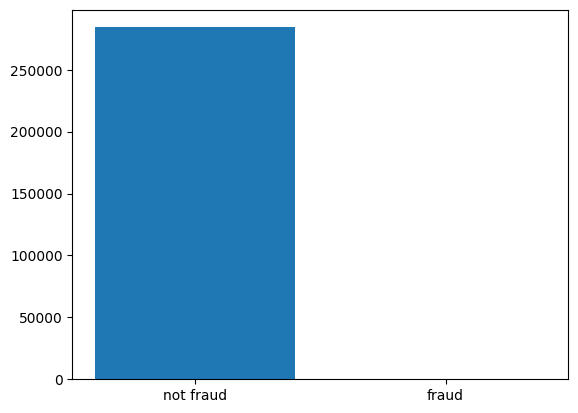

In [2]:
# 1-1. EDA
# 1) 종속변수는 Class 변수이면서 int타입이며, 독립변수는 Class 변수를 제외한 나머지이며, float64이다.
# 2) 종속변수 분포
import matplotlib.pyplot as plt
plt.bar(['not fraud', 'fraud'], df['Class'].value_counts().values)
# 막대그래프로 종속변수의 분포를 살펴본 결과, 사기 데이터가 월등히 적기 떄문에 보이지 않을 정도로 클래스 불균형이 심하다.
# 추후 업 샘플링이나, 다운샘플링을 통해 클래스 불균형을 맞춰줄 필요가 있다.

In [3]:
pd.set_option('display.max_columns', None)
# 3) 결측치 : 결측치는 존재하지 않는다.
# 4) 모델 적용 : 모델
# 5) 중복된 열
df_temp = df[df.duplicated()]
df_temp2 = df_temp.drop_duplicates(keep = 'last')
df_temp2
# 773개의 로우가 중복이 존재하지만 어떻게 쌓였는지에 대한 내용을 모르기 떄문에 삭제하기는 어렵다고 생각한다.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
223,145.0,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,0.158123,-1.224834,1.314398,0.304425,-0.290434,-2.014511,-0.772540,0.696610,0.017855,2.177312,-0.277406,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


<AxesSubplot:>

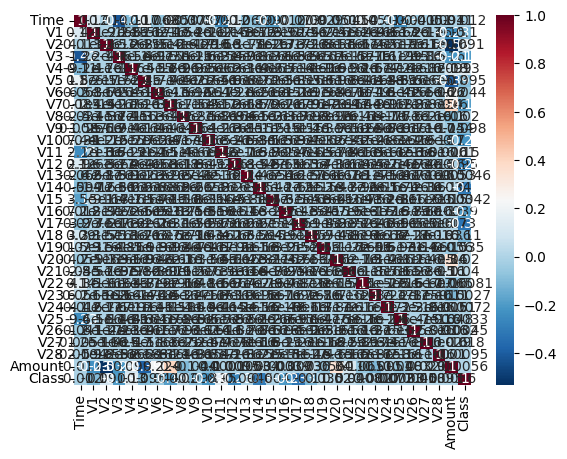

In [4]:
# 1-2. 상관분석 후 이상치 데이터 처리
# 1) 상관분석
# seaborn의 heatmap으로 상관관계를 살펴봤을 때, 상관관계가 0.8이상인 독립변수 간 다중공선성은 보이지 않는다.
# 더불어 독립변수와 종속변수 간 상관관계가 높은 변수도 보이지 않는데, 이럴경우 파생변수도 고려해야 되지만
# 현재 데이터상 독립변수끼리 결합 및 가공이 쉽지 않아, 파생변수는 고려하기 어렵다.
import seaborn as sns
df_corr = df.corr(method = 'pearson')
sns.heatmap(df_corr,
            xticklabels = df.columns,
            yticklabels = df.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidths = 0.00000001)

<AxesSubplot:>

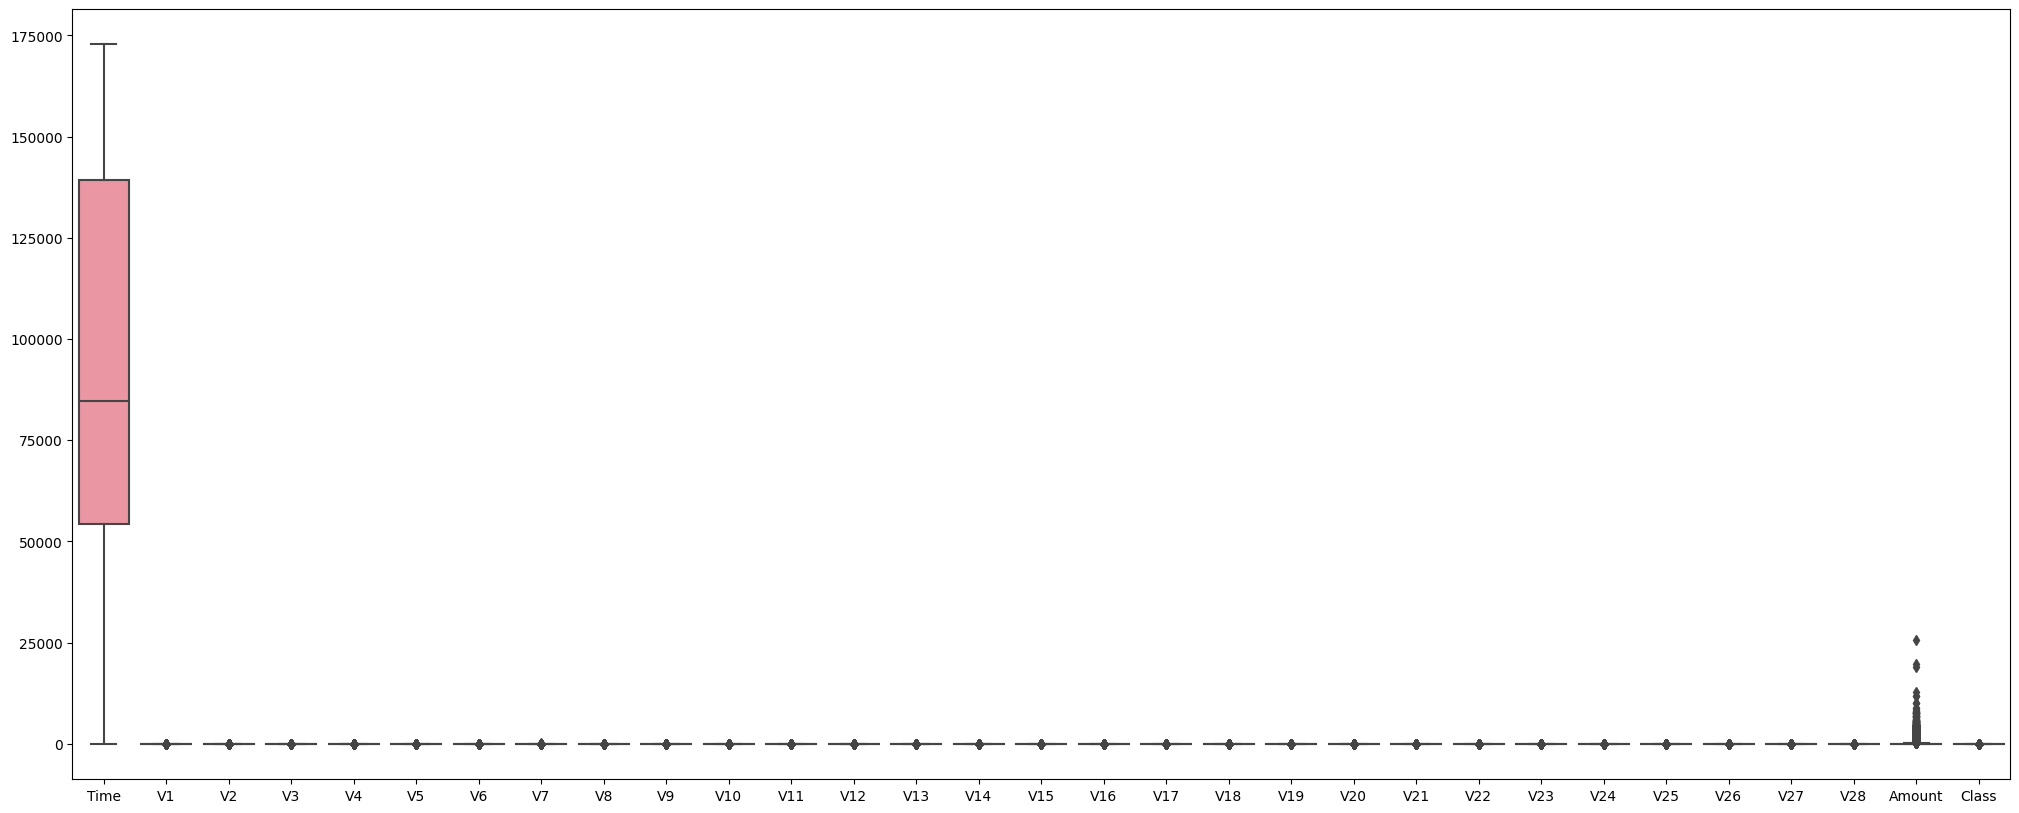

In [5]:
# 2) 이상치 데이터 처리
# boxplot으로 이상치 인식
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(1,1, figsize = (25,10))
sns.boxplot(data = df)
# boxplot으로 이상치 살펴봤을 때, Amount 변수에 대한 이상치가 존재한다.
# 이상치가 연속적으로 이어져 있으며, 분석목적이 사기탐지를 위한 것이므로, 해당 이상치에 대한 현업의 의견이 필요하다.

PCA
[0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.01052982 0.00140516]
0.8213983457746562
TruncatedSVD
[0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]
0.821398345774654


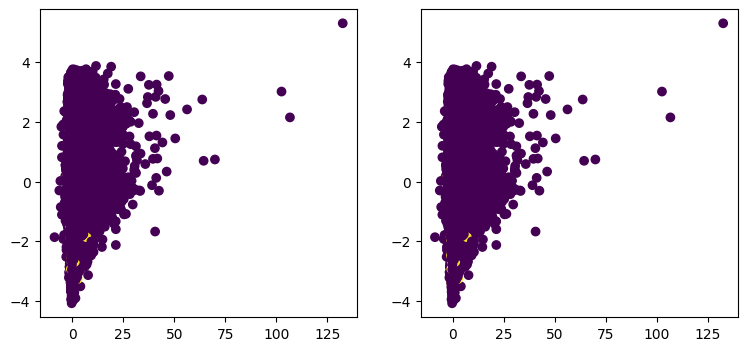

In [6]:
# 2-1. 차원축소 방법 2가지 이상 비교하고 한가지 선택
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

X = df.drop(['Class'], axis = 1)
y = df['Class']

# 차원축소를 위해서는 원본데이터 변수들의 스케일 작업을 수행해야 한다.
ss = StandardScaler()
X_ss = ss.fit_transform(X)


pca = PCA(random_state = 2023)
X_pca = pca.fit(X_ss)
print('PCA')
print(X_pca.explained_variance_ratio_)
print(sum(X_pca.explained_variance_ratio_[:23])) # 각 주성분마다 원본의 분산을 보존하는 비율
# PCA을 수행했을 때 주성분 23번까지 원본 데이터의 분산을 82%까지 설명한다.
# 이를 바탕으로 TruncatedSVD을 수행하겠다.

tsvd = TruncatedSVD(n_components=23, random_state = 2023)
X_tsvd = tsvd.fit(X_ss)
print('TruncatedSVD')
print(X_tsvd.explained_variance_ratio_)
print(sum(X_tsvd.explained_variance_ratio_[:23]))
# TruncatedSVD도 주성분 23번까지 원본 데이터의 분산을 82%까지 설명하지만 PCA 수행보다 미세한 차이로 설명력이 낮아 PCA를 선택하겠다.

# Scatter Plot은 두 개의 주성분이 약 80% 이상의 원본 데이터의 분산의 설명력을 가질 때 의미가 있지만 수행해보았다.
fig, axs = plt.subplots(1,2, figsize = (9,4))
X_pca = pca.transform(X_ss)
X_tsvd = tsvd.transform(X_ss)
axs[0].scatter(x = X_pca[:,0], y = X_pca[:,1], c = y)
axs[1].scatter(x = X_tsvd[:,0], y = X_tsvd[:,1], c = y)

In [7]:
# 2-2. 선택한 차원축소 구현
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df.drop(['Class'], axis = 1)
y = df['Class']
ss = StandardScaler()
X_ss = ss.fit_transform(X)

pca = PCA(n_components = 23, random_state = 2023)
X_pca = pca.fit_transform(X_ss)


temp_columns = ['P1', 'P2', 'P3','P4', 'P5', 'P6','P7', 'P8', 'P9','P10', 'P11', 'P12',
                'P13', 'P14', 'P15','P16', 'P17', 'p18', 'p19','p20','p21','p22','p23']

df_X = pd.DataFrame(X_pca, columns = temp_columns)
df = pd.concat([df_X, y], axis = 1)
df

# 선택한 PCA 작업을 수행했다. 주성분 23개까지 82% 설명력을 가지므로, PCA 객체 초기생성시 n_componets을 23으로 설정했다.
# fit_transform을 수행 후 temp_columns으로 변수명을 생성했으며, 기존의 종속변수와 결합하여 새로운 데이터프레임을 생성했다.

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,p18,p19,p20,p21,p22,p23,Class
0,0.416630,-2.532664,1.072953,-0.085602,0.437726,0.514722,0.019427,-0.047775,0.135286,-0.371591,-0.094244,-0.622618,-0.211497,-0.336874,0.140892,-0.177691,-0.691245,0.560512,-0.912072,0.517279,-0.330586,-0.446469,0.819263,0
1,-0.393453,-2.077326,-0.160905,-0.721929,-0.305891,-0.593220,0.463530,0.359015,0.264397,-0.173812,1.014124,0.127103,-0.213489,0.744385,0.371683,0.493814,0.288442,-0.279104,0.661954,-0.134247,-0.428604,0.877306,-0.537150,0
2,1.868525,-2.533497,0.035158,-0.660159,0.000797,-0.708158,1.436190,-0.615186,-1.507606,-0.491498,-0.060441,-3.229601,-0.762909,-0.489243,1.353583,-0.608942,0.544397,1.071042,-1.152832,0.264851,0.399918,-0.559768,-1.488889,0
3,0.315744,-1.783506,-0.621946,-0.671634,-2.189277,0.931982,0.790305,-0.790532,0.049204,-0.116154,0.104789,-1.507487,0.238854,0.947762,-0.156869,0.268321,-0.082758,0.840808,-1.259356,0.327088,-0.190445,-1.995764,-0.948142,0
4,-0.004379,-1.488415,0.743998,0.599332,0.561353,-0.309692,-0.728772,-0.166509,0.887778,0.434546,-0.753578,-0.927673,-0.679159,-0.100038,-0.580273,0.047150,-0.125602,0.958792,0.066521,0.812119,-0.469850,-0.338784,1.171496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-1.493200,1.900149,-3.181600,-1.839475,1.692822,2.138678,0.302086,0.991675,-0.530326,-2.526338,-3.930109,1.680180,4.558789,1.339154,-0.368893,-0.881396,1.823686,1.510355,6.036670,-6.537033,5.754771,-5.033648,0.508434,0
284803,-0.366836,0.842366,0.250833,-0.337179,1.051930,-0.137446,-0.548167,-0.234312,-0.799112,-0.341087,0.797718,-1.594447,-0.186615,0.610212,-0.373139,-1.534042,0.748809,1.190455,-1.393560,0.628760,-1.001476,0.436126,-1.613245,0
284804,-0.194063,2.070788,-0.609559,-1.653238,0.747237,-0.725846,1.198064,0.739960,0.155886,1.345036,0.188282,0.046566,-0.591526,-0.267284,1.739409,-1.378186,-0.644179,1.424189,-0.689030,-0.449198,0.121287,0.612999,-0.807765,0
284805,-0.466089,1.225394,1.346580,0.428130,0.439095,0.928517,-0.520278,-1.077596,1.720329,0.883132,0.247870,-0.137724,-0.658181,-1.133620,0.028845,-0.116773,-0.808895,-0.060825,-1.218652,0.000431,0.995617,-0.942324,1.689714,0


0    284315
1       492
Name: Class, dtype: int64


<BarContainer object of 2 artists>

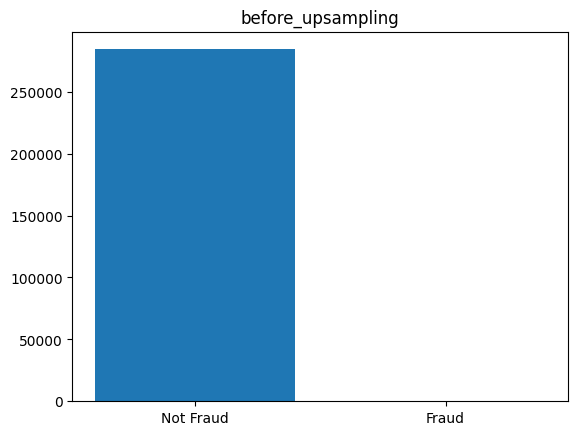

In [8]:
# 3-1. [2-2] 데이터로 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현
# 데이터 세트의 균형을 맞추기 위해 업 샘플링을 적용할 수 있다.
# 업 샘플링은 소수 레이블을 가진 데이터 세트를 다수 레이블을 가진 데이터세트의 수 만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다.
# 일반적으로 불균형한 데이터를 처리하는 방식으로 업 샘플링을 사용하는데, 이는 언더 샘플링의 경우 데이터 손실의 문제로 예측성능이 저하되는 단점이 있다.

# 대표적으로 랜덤오버샘플링과 KNN을 이용한 SMOTE 기법이 있다.
# 랜덤오버샘플링은 소수 클래스의 정보를 복제하여 다수 클래스의 크기에 맞추는 기법으로, 이는 과적합 우려가 있다.
# SMOTE는 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성한다.
# 과적합을 막을 수 있으나, 새로운 데이터나 적은 데이터 셋의 경우에는 활용하기 어렵다.

# 데이터 세트의 균형을 맞추기 위해 언더 샘플링 기법이 사용될 수 있다.
# 언더 샘플링은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 기법이다.
# 소수의 클래스를 만드는 과정에서 데이터 손실 문제가 발생할 수 있으며, 이는 과소적합의 우려가 있다.
print(df['Class'].value_counts())
plt.title('before_upsampling')
plt.bar(['Not Fraud', 'Fraud'], df['Class'].value_counts().values)

# 오버샘플링 기법이 적합하다. 전체 284807 데이터 중, 사기 데이터는 492개 밖에 클래스 분균형이 심각하며, 사기 데이터를 대표하기에 턱없이 부족한 데이터이다.
# 심지어 언더 샘플링을 하면 전체 데이터수가 더 작아지기 때문에 과소적합의 우려가 있어, 업 샘플링이 적합하다.

<BarContainer object of 2 artists>

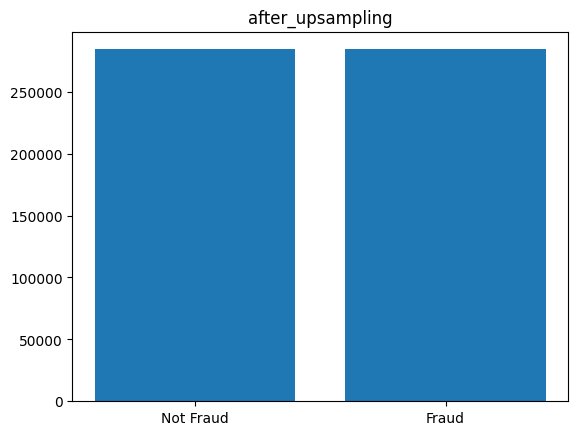

In [9]:
# 3-2. [3-1] 구현 및 알고리즘 2가지 이상 비교, 성능 측정
from imblearn.over_sampling import SMOTE
X = df.drop(['Class'], axis = 1)
y = df['Class']
smote = SMOTE(k_neighbors=5)
X_re, y_re = smote.fit_resample(X,y)
plt.title('after_upsampling')
plt.bar(['Not Fraud', 'Fraud'], y_re.value_counts().values)

# 업 샘플링 기법 중 SMOTE 기법을 사용했다.
# SMOTE는 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성하여, 과대적합을 방지할 수 있으며,
# 데이터 셋도 작지 않기 때문에 SMOTE기법을 사용했다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(random_state = 2023)
svc = SVC(kernel='linear')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import time
import numpy as np

kfold = KFold()

def model_result(model):
    result_accurancy = []
    result_precision_score = []
    result_recall_score = []
    result_f1_score = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, test_size = 0.3, stratify = y_re, random_state = 2023)
    start = time.time()
    model.fit(X_train,y_train)
    end = time.time()
    
    
    for train_index, test_index in kfold.split(X_re):
        
        X_train, X_test = X_re.iloc[train_index, :], X_re.iloc[test_index, :]
        y_train, y_test = y_re.iloc[train_index], y_re.iloc[test_index]
      
        y_pred = model.predict(X_test)
        result_accurancy.append(accuracy_score(y_test, y_pred))
        result_recall_score.append(recall_score(y_test, y_pred))
        result_precision_score.append(precision_score(y_test, y_pred))
        result_f1_score.append(f1_score(y_test, y_pred))
        
    print('속도 : ', f"{end-start: 5f} sec")
    print('정확도 : ', np.mean(result_accurancy))  
    print('재현율 : ', np.mean(result_recall_score))
    print('정밀도 : ', np.mean(result_precision_score))  
    print('f1_score : ', np.mean(result_f1_score))  
    #print('ROC_AUC_SCORE : ',np.mean(result_roc_auc_score) )
    
print("LogisticRegression")    
model_result(lr)
print('----------')
#print("RandomForestClassifier")   
#model_result(rf)
#print('----------')
#print("XGBClassifier")   
#model_result(xgb)
#print('----------')
print("SVC")   
model_result(svc)  

# 업 샘플링 결과로 LogisticRegression과 SVC 비교한 결과는 아래와 같다.
# 정리하면 속도측면에서는 LogisticRegression, 정확도 측면에서는 SVC가 성능이 좋게 나왔다.

LogisticRegression
속도 :   0.537239 sec
정확도 :  0.9324428890491181
재현율 :  0.8913763439817581
정밀도 :  0.6199367992677945
f1_score :  0.6100622705974076
----------
SVC


In [11]:
# 4-1. [2-2] 데이터로 부정거래 감지 모델 2가지 이상 비교 및 선택
# 부정거래 감지 모델은 이상치 탐색이 필요하다. 군집분석이 이상치 탐색에 많이 사용되므로, K-means와 가우시안 혼합모델을 중심으로 수행하겠다.
# K-means 군집분석은 클러스터와 객체 간 거리차이의 분산이 최소가 되도록 군집을 형성하는 알고리즘이다.
# 원형 데이터나 변수가 적은 데이터에 적합하며, 초기 군집 수 결정과 이상치에 민감하다는 단점이 있다.
# 가우시안 혼합모델은 Gaussian 분포가 여러 개 혼합된 알고리즘이다.
# 각 데이터는 추정된 Gaussian 분포 중, 어느 분포로 부터 나왔을 확률이 높은지에 따라 배당하는 알고리즘이다.
# K-means와 달리 각 군집에 속하는 확률을 표현할 수 있는 유연한 장점이 있다.
# K-means와 마찬가지로 초기 군집 수를 결정해야하는 단점이 있다.
# 해당 데이터 셋은 변수의 수가 많기 때문에 가우시안 혼합모델을 선택하겠다.


# 4-2. [4-1] 구현 및 알고리즘 성능 측정
# 가우시안 혼합모델은 먼저 최적의 군집 수를 결정해야 한다. 
# 최적의 군집 수를 결정하기 위해 콜린스키 하라비츠와 엘보우 기법을 아래와 같이 이용했다.
from sklearn.cluster import KMeans
from sklearn import metrics
for k in range(2,10):
    kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(X_re)
    labels = kmeans_model.labels_
    print(metrics.calinski_harabasz_score(X_re, labels))

# 콜린스키 하라비츠 결과 군집 수는 2일 때 가장 점수가 높다.

626945.176352169
529607.1184507546
477051.0331487122
475302.5565186417
452405.2365090311
452220.9760563316
422834.9793877723
402390.3233545616


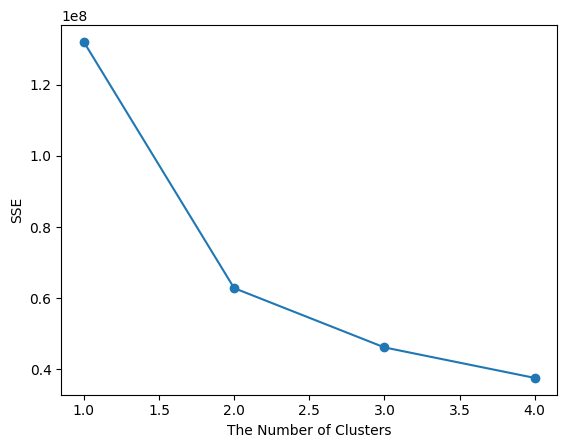

[132044373.16027102, 62801783.53777365, 46124888.74915684, 37546078.854300305]


In [14]:
import matplotlib.pyplot as plt
def elbow(X_re):
    sse=[]
    for i in range(1, 5):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X_re)
        sse.append(km.inertia_)
    
    plt.plot(range(1,5), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X_re)
# 엘보우 기법을 보았을 때 기울기 군집수가 3일 때부터 기울기가 소실 되므로 콜린스키 하라비츠와 종합적으로 살펴본 결과 군집 수는 2가 적당하다.

In [32]:
from sklearn.mixture import GaussianMixture
import time as time
gmm = GaussianMixture(n_components=2, random_state = 2023)
start = time.time()
gmm.fit(X_re) # GMM 클러스터링 수행 및 최종 클러스터 라벨링
end = time.time()
labels = gmm.predict(X_re)

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df = pd.concat([X_re,y_re], axis = 1)
df['cluster'] = labels.copy()
df['cluster'] = np.where(df['cluster'] == 0, 1, 0)

print('속도 : ', f"{end-start: 5f} sec")
print('정확도 : ' , accuracy_score(df['Class'], df['cluster']))
print('재현율 : ' , recall_score(df['Class'], df['cluster']))
print('정밀도 : ' , precision_score(df['Class'], df['cluster']))
print('f1_score : ', f1_score(df['Class'], df['cluster']))

# GaussianMixture을 통해 가우시안 혼합분포 알고리즘을 수행했다.
# 최적의 군집수가 2로 결정했으므로, n_components을 2로 설정했으며, 동일한 결과치를 얻고자, random_state를 사용했다.
# 예측을 통해 나온 label을 바탕으로 검증을 실시하였다.
# 검증결과 정확도는 70%, 재현율 58%, 정밀도 78%, f1_score 0.66 나왔으며, 성능이 올리기위한 다른 알고리즘을 고려할 필요가 있다.

속도 :   64.501663 sec
정확도 :  0.7092555791991277
재현율 :  0.5818511158398255
정밀도 :  0.7808079520835989
f1_score :  0.6668050561888331


In [43]:
# 4-3. 데이터분석가 관점에서 [3-2]와 [4-2]의 결과에 대해 분석
# 업 샘플링을 안했을 경우의 가우시안 혼합분포 알고리즘 수행
from sklearn.mixture import GaussianMixture
import time as time

gmm = GaussianMixture(n_components=2, random_state = 2023)
start = time.time()
gmm.fit(df_X) # GMM 클러스터링 수행 및 최종 클러스터 라벨링
end = time.time()
labels = gmm.predict(df_X)

import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df_not_sampling = pd.concat([df_X,y], axis = 1)
df_not_sampling['cluster'] = labels.copy()
df_not_sampling['cluster'] = np.where(df_not_sampling['cluster'] == 0, 1, 0)

print('속도 : ', f"{end-start: 5f} sec")
print('정확도 : ' , accuracy_score(df_not_sampling['Class'], df_not_sampling['cluster']))
print('재현율 : ' , recall_score(df_not_sampling['Class'], df_not_sampling['cluster']))
print('정밀도 : ' , precision_score(df_not_sampling['Class'], df_not_sampling['cluster']))
print('f1_score : ', f1_score(df_not_sampling['Class'], df_not_sampling['cluster']))

속도 :   62.531613 sec
정확도 :  0.5317109481157415
재현율 :  0.09146341463414634
정밀도 :  0.00033842220049635255
f1_score :  0.000674349252970883


In [48]:
# 업 샘플링을 안했을 경우 정확도, 재현율, 정밀도, f1_score 관점에서 성능이 확연히 떨어지는 것을 볼 수 있다.
# 정상을 정확히 분류하는 것과 이상을 정확히 분류하는 것 중 일반적으로 이상을 정확히 분류하는 것이 더 중요하다.
# 위와 같이 업 샘플링을 안했을 경우, 이상 데이터를 정확히 찾아내지 못할 수 있다는 문제점이 존재한다.
# 특히 해당 데이터 셋은 사기 데이터가 전체 데이터의 0.1%이기 때문에, 업 샘플링이 필수적이다.